<a href="https://colab.research.google.com/github/tienpm/CS114.K21.KHTN/blob/master/CapstoneProject/18520166_PhamManhTien_MLProjectReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **SINH VIÊN THỰC HIỆN: PHẠM MẠNH TIẾN - MSSV: 18520166**

## **MÃ LỚP: CS114.K21.KHTN**

## **UIT - VNU**

#  **I. MÔ TẢ BÀI TOÁN**
#### Input: Một ảnh có chứa bông hoa của một trong 12 loài hoa (hoa Dừa Cạn, hoa Bông Trang, hoa Hồng, hoa Giấy, hoa Chi Cúc, hoa Lan Hồ Điệp, hoa Sứ, hoa Huỳnh Anh, hoa Cúc, hoa Mào Gà, hoa Chiều Tím, hoa Đồng Tiền)
#### Output: Bông hoa trong ảnh thuộc loài hoa nào trong 12 loài hoa
##### Dataset được thu thập với bạn Nguyễn Quyết Thắng - MSSV: 18520152
##### Dataset chứa 1200 ảnh thuộc 12 loài hoa với 100 ảnh mỗi loài. Các bông hoa được chọn để chụp ảnh là các bông hoa trồng ở khuôn viên Ký túc xá khu B - ĐHQG Hồ Chí Minh (hoa Chiều Tìm); cổng trước UIT (hoa Giấy); các vườn hoa cây cảnh ở đường Phạm Văn Đồng (hoa Lan Hồ Điệp) và đường Kha Vạn Cân (hoa Dừa Cạn, hoa Bông Trang, hoa Hồng, hoa Chi Cúc) quận Thủ Đức; khu đô thị Vạn Phúc, Hiệp Bình Phước, quận Thủ Đức (hoa Sứ, hoa Huỳnh Anh); công viên Gia Định quận Phú Nhuận (hoa Mào Gà, hoa Cúc, hoa Đồng Tiền). 
#### Các ảnh được chụp ở nhiều điều kiện ánh sáng khác nhau khi trời nhiều mây hoặc có mưa nhỏ nên cường độ ánh sáng thấp, lúc trời nắng với ánh sáng cường độ cao. Một số ảnh chụp bông hoa có nước đọng lại ở trên cánh hoa khi trời vừa mới mưa xong hoặc đang mưa nhỏ, nhưng không được rủ nước vì có thể làm tổn hại đến bông hoa của chủ vườn hoa, dẫn đến một số ảnh hoa bị nhiễu vì nước mưa bám nhiều trên cánh hoa
#### Toàn bộ Dataset được upload ở link: https://drive.google.com/drive/folders/1lrT29g_HS2uEsoVd4-fue26Ps9B7zw-Z?usp=sharing 

# **II. CHUẨN BỊ DATASET VÀ TIỀN XỬ LÝ DỮ LIỆU**
- Dataset được thu thập và chuẩn bị tên file theo format image_xxxx.jpg để tiện cho việc gán nhãn bằng code python. Mỗi class có 100 ảnh nên tên file được sắp xếp theo thứ tự tương ứng, ví dụ hoa Dừa Cạn sẽ có tên file là image_0001.jpg -> image_0100.jpg, hoa Bông trang sẽ có thứ tự tên file là image_0101.jpg -> image_0200.jpg

- Dataset được nén thành file flowers.zip và được để ở đường dẫn đã cung cấp ở phần mô tả dataset.

Kết nối google drive vào google colab và copy file chứa dataset vào google colab để tiến hành train

In [1]:
print("[INFO] Connect Google Colab cloud with google drive to get dataset")
from google.colab import drive
drive.mount('/content/gdrive')

[INFO] Connect Google Colab cloud with google drive to get dataset
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/My Drive/flowers_dataset"
print("[INFO] Coping dataset file from google drive to current google colab host")
!cp "/content/gdrive/My Drive/flowers_dataset/flowers.zip" "/content/"
print("[INFO] Copy succesfully")
%cd "/content/"

/content/gdrive/My Drive/flowers_dataset
[INFO] Coping dataset file from google drive to current google colab host
[INFO] Copy succesfully
/content


**Giải nén file dataset flowers.zip**

In [ ]:
#-----------------------------------------
# ORGANIZE FLOWERS DATASET
#-----------------------------------------
import os
import glob
import datetime
import cv2

flowers_dataset_name = 'flowers.zip'
train_dir      = os.path.join(os.getcwd(),"dataset")

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

print("[INFO] Extracting dataset ... ")
%cd "dataset"
!unzip "/content/flowers.zip" 
print("[INFO] Dataset extracted successfully.")
# Rename directory in dataset "jpg" -> "train"
if os.path.exists(train_dir + "/jpg"):
    print("Access dataset successfully")
    print("Rename ...")
    os.rename(train_dir + "/jpg", train_dir + "/train")
    print("Rename successfully")

**Phân tách ảnh của mỗi class thành mỗi thư mục riêng để gán nhãn**

In [4]:
# take all the images from the dataset
image_paths = sorted(glob.glob(train_dir + "/train/*.jpg"))
print("Number of image in dataset: {}".format(len(image_paths)))
# print(image_paths)

Number of image in dataset: 1200


In [5]:
# Get the class label limit
class_limit = 12
# flower17 class names
class_names = ["hoa dua can", "hoa bong trang", "hoa hong", "hoa giay", "hoa chi cuc", "hoa lan ho diep",
               "hoa su", "hoa huynh anh", "hoa cuc", "hoa mao ga", "hoa chieu tim", "hoa dong tien"]
 # variables to keep track
label = 0
i = 0
j = 100
for x in range(1, class_limit+1):
    # create a folder for that class
    os.makedirs(train_dir + "/train/" + class_names[label])
    
    # get the current path
    cur_path = train_dir + "/train/" + class_names[label] + "/"
    
    # loop over the images in the dataset
    for index, image_path in enumerate(image_paths[i:j], start=1):
      original_path   = image_path
      image_file_name = str(index) + ".jpg"
      os.rename(original_path, cur_path + image_file_name)
    
    i += 100
    j += 100
    label += 1

# **III. RÚT TRÍCH ĐẶC TRƯNG**

**Cài đặt thư viện mahotas cho việc rút trích đặc trưng và thư viện h5py cho viêc lưu đọc ghi các vector đặc trưng**

In [6]:
# Install enviroment
!pip install mahotas
!pip install h5py

     |████████████████████████████████| 5.7MB 2.6MB/s 


**Phương pháp rút trích đặc trưng mà nhóm sử dụng là:**
- Thuật toán rút trích hình dáng bông hoa: Hu Moments.
- Thuật toán rút trích vân của cánh hoa: Text Halarick
- Thuật toán rút trích màu của bông hoa: Color Histogram

Vì nhóm mới tìm hiểu về xử lý ảnh nên không thể mô tả từng bước của thuật toán mà chỉ dừng ở kết quả của thuật toán mang lại và kết quả đó phù hợp cho việc rút trích đặc trưng của dataset.

Trước khi vào quá trình rút trích ảnh sẽ có kích thước [m x n] với m và n lần lượt là chiều cao và chiều rộng ban đầu của ảnh, sau đó ảnh sẽ được resize về kích thước [500 x 500] sau đó đưa lần lượt vào từng thuật toán để cho ra ba vector [1 x n] với mỗi giá trị phần tử trong vector mô tả một giá trị sampling point mang kết quả của mỗi thuật toán. Sau đó 3 vector được gộp lại thành vector [1 x m] để tạo thành 1 vector đặc trưng cho ảnh


In [7]:
#-----------------------------------
# GLOBAL FEATURE EXTRACTION
#-----------------------------------
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import mahotas
import h5py

#--------------------
# tunable-parameters
#--------------------
images_per_class = 100
fixed_size       = tuple((500, 500))
output_path = os.path.join(train_dir, "output")
if not os.path.exists(output_path):
  os.mkdir(output_path)
train_path = os.path.join(train_dir, "train")
h5_data          = os.path.join(output_path, "data.h5")
h5_labels        = os.path.join(output_path, "labels.h5")
bins             = 8

**Hàm rút trích đặc trưng cho mỗi thuật toán**

In [8]:
# feature-descriptor-1: Hu Moments
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

# feature-descriptor-2: Haralick Texture
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    return haralick

# feature-descriptor-3: Color Histogram
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    return hist.flatten()

In [9]:
# get the training labels
train_labels = os.listdir(train_path)

# sort the training labels
train_labels.sort()
print(train_labels)

['hoa bong trang', 'hoa chi cuc', 'hoa chieu tim', 'hoa cuc', 'hoa dong tien', 'hoa dua can', 'hoa giay', 'hoa hong', 'hoa huynh anh', 'hoa lan ho diep', 'hoa mao ga', 'hoa su']


**Quá trình rút tríc đặc trưng cho mỗi ảnh thành 1 vector một chiều và gộp nhiều vector lại thành ma trận [1200 x n] (n số phần tử trong vector đặc trưng của mỗi ảnh)**

In [10]:
# empty lists to hold feature vectors and labels
global_features = []
labels          = []
# loop over the training data sub-folders
for training_name in train_labels:
    # join the training data path and each species training folder
    dir = os.path.join(train_path, training_name)

    # get the current training label
    current_label = training_name

    # loop over the images in each sub-folder
    for x in range(1,images_per_class+1):
        # get the image file name
        file = dir + "/" + str(x) + ".jpg"
        
        # read the image and resize it to a fixed-size
        image = cv2.imread(file)
        image = cv2.resize(image, fixed_size)

        ####################################
        # Global Feature extraction
        ####################################
        fv_hu_moments = fd_hu_moments(image)
        fv_haralick   = fd_haralick(image)
        fv_histogram  = fd_histogram(image)

        ###################################
        # Concatenate global features
        ###################################
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])

        # update the list of labels and feature vectors
        labels.append(current_label)
        global_features.append(global_feature)

    print("[STATUS] processed folder: {}".format(current_label))

print("[STATUS] completed Global Feature Extraction...")

[STATUS] processed folder: hoa bong trang
[STATUS] processed folder: hoa chi cuc
[STATUS] processed folder: hoa chieu tim
[STATUS] processed folder: hoa cuc
[STATUS] processed folder: hoa dong tien
[STATUS] processed folder: hoa dua can
[STATUS] processed folder: hoa giay
[STATUS] processed folder: hoa hong
[STATUS] processed folder: hoa huynh anh
[STATUS] processed folder: hoa lan ho diep
[STATUS] processed folder: hoa mao ga
[STATUS] processed folder: hoa su
[STATUS] completed Global Feature Extraction...


In [11]:
# get the overall feature vector size
print("[STATUS] feature vector size {}".format(np.array(global_features).shape))

# get the overall training label size
print("[STATUS] training Labels {}".format(np.array(labels).shape))

# encode the target labels
targetNames = np.unique(labels)
le          = LabelEncoder()
target      = le.fit_transform(labels)
print("[STATUS] training labels encoded...")

# scale features in the range (0-1)
scaler            = MinMaxScaler(feature_range=(0, 1))
rescaled_features = scaler.fit_transform(global_features)
print("[STATUS] feature vector normalized...")

print("[STATUS] target labels: {}".format(target))
print("[STATUS] target labels shape: {}".format(target.shape))

# save the feature vector using HDF5
h5f_data = h5py.File(h5_data, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(rescaled_features))

h5f_label = h5py.File(h5_labels, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(target))

h5f_data.close()
h5f_label.close()

print("[STATUS] end of training..")

[STATUS] feature vector size (1200, 532)
[STATUS] training Labels (1200,)
[STATUS] training labels encoded...
[STATUS] feature vector normalized...
[STATUS] target labels: [ 0  0  0 ... 11 11 11]
[STATUS] target labels shape: (1200,)
[STATUS] end of training..


# **IV. LỰA CHỌN MODEL, TRAINING VÀ FINE TUNING**
**Nhóm đã tiến hành thử train dataset trên nhiều model máy học như Logistic Regression ,Linear Discriminant Analysis, K-Neighbors Classifier, Decision Tree, Random Forest, Naive Bayes, SVM, LinearSVC. Và chọn ra model trả về độ chính xác (accuracy) lớn nhất để tiến hành đánh giá kết quả với tập dữ liệu mới chưa được train.**


In [12]:
import warnings
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

num_trees = 100
test_size = 0.20
seed      = 9
test_path  = os.path.join(train_dir, "test")
if not os.path.exists(test_path):
  os.mkdir(test_path)
scoring = "accuracy"
models = []
models.append(('LR', LogisticRegression(random_state=seed)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=seed)))
models.append(('LinearSVC', LinearSVC(C=1, loss='squared_hinge', penalty='l2',multi_class='ovr')))

# variables to hold the results and names
results = []
names   = []

# import the feature vector and trained labels
h5f_data  = h5py.File(h5_data, 'r')
h5f_label = h5py.File(h5_labels, 'r')

global_features_string = h5f_data['dataset_1']
global_labels_string   = h5f_label['dataset_1']

global_features = np.array(global_features_string)
global_labels   = np.array(global_labels_string)

h5f_data.close()
h5f_label.close()

# verify the shape of the feature vector and labels
print("[STATUS] features shape: {}".format(global_features.shape))
print("[STATUS] labels shape: {}".format(global_labels.shape))

print("[STATUS] training started...")

[STATUS] features shape: (1200, 532)
[STATUS] labels shape: (1200,)
[STATUS] training started...


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


**Chia train set thành train set và vallidation set theo tỉ lệ 80% và 20% (test_size  = 0.2)**

In [13]:
# split the training and testing data
(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
                                                                                          np.array(global_labels),
                                                                                          test_size=test_size,
                                                                                          random_state=seed)

print("[STATUS] splitted train and test data...")
print("Train data  : {}".format(trainDataGlobal.shape))
print("Test data   : {}".format(testDataGlobal.shape))
print("Train labels: {}".format(trainLabelsGlobal.shape))
print("Test labels : {}".format(testLabelsGlobal.shape))

[STATUS] splitted train and test data...
Train data  : (960, 532)
Test data   : (240, 532)
Train labels: (960,)
Test labels : (240,)


**Vì dataset chỉ chứa 1200 ảnh nên tập dữ liệu nhỏ để cho được kết quả chính xác và tránh overfitting nên nhóm đã sử dụng kĩ thuật cross-validation với hy vọng sẽ tránh cho model bị overfitting**
**Chi tiết về kĩ thuật có thể tham khảo mục 2.2 của bài viết ở link: https://machinelearningcoban.com/2017/03/04/overfitting/#-cross-validation**

LR: 0.960417 (0.020199)
LDA: 0.896875 (0.026125)
KNN: 0.912500 (0.030262)
CART: 0.858333 (0.028792)
RF: 0.968750 (0.010417)
NB: 0.847917 (0.044488)
SVM: 0.959375 (0.012715)
LinearSVC: 0.968750 (0.023292)


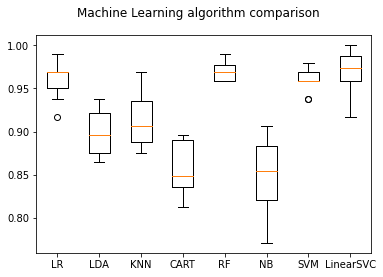

In [14]:
# 10-fold cross validation
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Machine Learning algorithm comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# **V. DỰ ĐOÁN VỚI TẬP DỮ LIỆU CHƯA ĐƯỢC TRAIN**

**Theo kết quả ở trên model Random Forest cho độ chính xác (accuracy) cao nhất ~97% nên nhóm tiến hành sử dụng model để dự đoán với tập dữ liệu thực tế chưa được train**

- Dự đoán với ảnh được random upload lên thư mục "/content/dataset/test"
- File ảnh được upload trong bài bài cáo được lưu trữ ở link: https://drive.google.com/drive/folders/1Q4lIDsEpLD8Ydy0-KMvsiw2hzVwyXxqf?usp=sharing

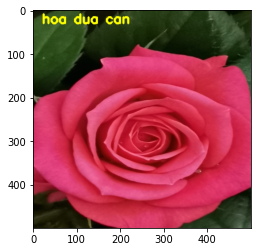

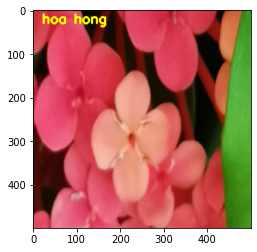

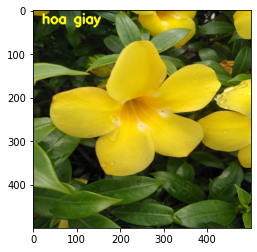

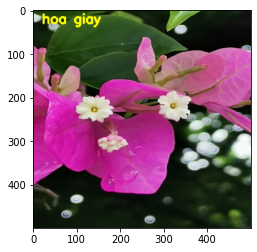

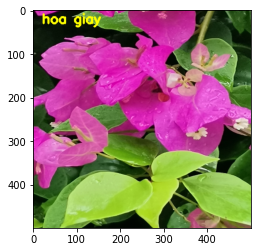

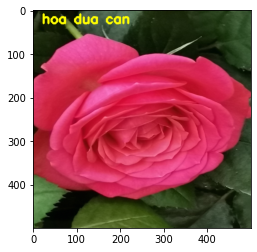

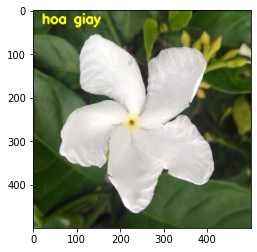

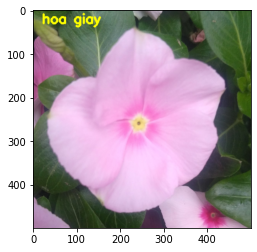

In [16]:
#-----------------------------------
# TESTING BEST ACCURACY MODEL 
#-----------------------------------

# to visualize results
import matplotlib.pyplot as plt

# create the model - Random Forests
clf  = RandomForestClassifier(n_estimators=num_trees, random_state=seed)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

# loop through the test images
for file in glob.glob(test_path + "/*.jpg"):
    # read the image
    image = cv2.imread(file)

    # resize the image
    image = cv2.resize(image, fixed_size)

    ####################################
    # Global Feature extraction
    ####################################
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)

    ###################################
    # Concatenate global features
    ###################################
    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments]).reshape(-1,1)

    # scale features in the range (0-1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    rescaled_feature = scaler.fit_transform(global_feature)

    # predict label of test image
    prediction = clf.predict(rescaled_feature.reshape(1, -1))[0]

    # show predicted label on image
    cv2.putText(image, train_labels[prediction], (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)

    # display the output image
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

**Copy test set mới trong thư mục flowers_test.zip và giải nén vào thư mục "/dataset/test/"**

In [17]:
%cd "/content/gdrive/My Drive/flowers_dataset"
print("[INFO] Coping test set file from google drive to current google colab host ...")
!cp "/content/gdrive/My Drive/flowers_dataset/flowers_test.zip" "/content/"
print("[INFO] Copy succesfully")
%cd "/content/"

/content/gdrive/My Drive/flowers_dataset
[INFO] Coping test set file from google drive to current google colab host ...
[INFO] Copy succesfully
/content


In [ ]:
print("[INFO] Extracting dataset ... ")
%cd "dataset/test/"
!unzip "/content/flowers_test.zip" 
print("[INFO] Dataset extracted successfully.")

**Dự đoán trên dataset mới chưa được train**

In [19]:
#-----------------------------------
# TESTING BEST ACCURACY MODEL 
#-----------------------------------

# to visualize results
import matplotlib.pyplot as plt

# create the model - Random Forests
clf  = RandomForestClassifier(n_estimators=num_trees, random_state=seed)

# fit the training data to the model
clf.fit(trainDataGlobal, trainLabelsGlobal)

# Initial test label for new test set haven't train
prediction_labels = []
test_labels = []

for i in range(0, class_limit):
  for _ in range(0, 10):
    test_labels.append(i)

new_flowers_test_path = test_path + "/flowers_test"
# loop through the test images
for file in glob.glob(new_flowers_test_path + "/*.jpg"):
    # read the image
    image = cv2.imread(file)

    # resize the image
    image = cv2.resize(image, fixed_size)

    ####################################
    # Global Feature extraction
    ####################################
    fv_hu_moments = fd_hu_moments(image)
    fv_haralick   = fd_haralick(image)
    fv_histogram  = fd_histogram(image)

    ###################################
    # Concatenate global features
    ###################################
    global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments]).reshape(-1,1)

    # scale features in the range (0-1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    rescaled_feature = scaler.fit_transform(global_feature)

    # predict label of test image
    prediction = clf.predict(rescaled_feature.reshape(1, -1))[0]
    prediction_labels.append(prediction)

**Kết quả:**

In [20]:
prediction_report = classification_report(test_labels, prediction_labels)
print(prediction_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        10
           5       0.18      0.20      0.19        10
           6       0.10      0.80      0.17        10
           7       0.07      0.20      0.11        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10

    accuracy                           0.10       120
   macro avg       0.03      0.10      0.04       120
weighted avg       0.03      0.10      0.04       120



# **VI. ĐÁNH GIÁ VÀ KẾT LUẬN**
- Model Random Forest được chọn bị overfittinng hoàn toàn. Vì giá trị precision và recall của rất nhiều class có giá trị 0 (dự đoán sai với toàn bộ ảnh trong test set)
- Kết quả này là vô nghĩa nên hệ thống không thể áp dụng trong thực tế

# **VI. HƯỚN PHÁT TRIỂN**
- Xây dựng bộ dataset với số lượng ảnh lớn hơn với chất lượng ảnh tốt hơn, như chụp ảnh với môi trường chiếu sáng tốt, cánh hoa không bị thấm nước hoặc bị bám nước
- Nghiên cứu sử dụng CNN để rút trích đặc trưng